In [1]:
#course 1 task 2 by Alden Parel

#importing libraries
import numpy as np
import pandas as pd
import pandas_profiling 
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

from sklearn.datasets import load_digits

#helpers
%matplotlib inline

In [2]:
#importing blackwell data and cleaning the duplicates
#data is the blackwell data we are going to use to discretize age
data = pd.read_csv(r'C:\Users\alden\OneDrive\Documents\Demographic_Data.csv')
data = data.drop_duplicates()

#data2 is a copy of data before discretizing age to discretize amount
data2 = pd.read_csv(r'C:\Users\alden\OneDrive\Documents\Demographic_Data.csv')
data2 = data2.drop_duplicates()

#data3 is for testing purposes to see if changing amount of bins affects outcome
data3 = pd.read_csv(r'C:\Users\alden\OneDrive\Documents\Demographic_Data.csv')
data3 = data3.drop_duplicates()


data4 = pd.read_csv(r'C:\Users\alden\OneDrive\Documents\Demographic_Data.csv')
data4 = data4.drop_duplicates()

#data5 = pd.read_csv(r'C:\Users\alden\OneDrive\Documents\Demographic_Data.csv')
#data5 = data5.drop_duplicates()

#data6 = pd.read_csv(r'C:\Users\alden\OneDrive\Documents\Demographic_Data.csv')
#data6 = data6.drop_duplicates()

In [3]:
print (np.median(data['age']))
print (np.max(data['age']))

45.0
85


In [4]:
#discretizing age

#bins = pd.IntervalIndex.from_tuples([(10, 20),(20,30), (30, 40), (40, 50), (50,60), (60,70), (70,80),(80,90)])
#pd.cut(data['age'], bins, labels=False, retbins=True,
#      right=False, duplicates='drop')

#making array for age bins    
bins_array = ([0,10,20,30,40,50,60,70,80,90])




In [5]:
#pandas.cut() Bin values into discrete intervals.
#Use cut when you need to segment and sort data values into bins.

#data['age']= array of ages
#bins_array= bins of age ranges
#labels = False returns only integer indicators of the bins

#1=10-20,2=20-30,3=30-40,4=40-50,5=50-60
#6=60-70,7=70-80,8=80-90
data['age_bin'] = pd.cut(data['age'],bins_array,labels = False )
data.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79979 entries, 0 to 79999
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   in-store  79979 non-null  int64  
 1   age       79979 non-null  int64  
 2   items     79979 non-null  int64  
 3   amount    79979 non-null  float64
 4   region    79979 non-null  int64  
 5   age_bin   79979 non-null  int64  
dtypes: float64(1), int64(5)
memory usage: 4.3 MB


In [6]:
data.head()

,in-store,age,items,amount,region,age_bin
0,0,37,4,281.03,2,3
1,0,35,2,219.51,2,3
2,1,45,3,1525.70,4,4
3,1,46,3,715.25,3,4
4,1,33,4,1937.50,1,3


In [7]:
data = data.drop(columns = ['age'])
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79979 entries, 0 to 79999
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   in-store  79979 non-null  int64  
 1   items     79979 non-null  int64  
 2   amount    79979 non-null  float64
 3   region    79979 non-null  int64  
 4   age_bin   79979 non-null  int64  
dtypes: float64(1), int64(4)
memory usage: 3.7 MB


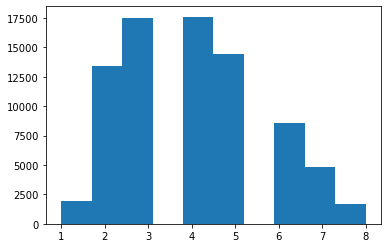

In [8]:
#histogram of the age bins
#0=10-20,1=20-30,2=30-40,3=40-50,4=50-60
#5=60-70,6=70-80,7=80-90
plt.hist(data['age_bin'])
plt.show()

In [9]:
#features
#.iloc[] is primarily integer position based (from 0 to length-1 of the axis)

X = data.iloc[:,0:4]
print('Summary of feature sample')
X.head()

Summary of feature sample


,in-store,items,amount,region
0,0,4,281.03,2
1,0,2,219.51,2
2,1,3,1525.70,4
3,1,3,715.25,3
4,1,4,1937.50,1


In [10]:
#dependent variable
y = data['age_bin']
y.head(10)

0    3
1    3
2    4
3    4
4    3
5    2
6    4
7    6
8    5
9    4
Name: age_bin, dtype: int64

In [11]:
#Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state = 123)

In [12]:
#Modeling (Classification)
algo = DecisionTreeClassifier()
model = algo.fit(X_train,y_train)

In [13]:
#Predictions
preds = model.predict(X_test)

In [14]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           1       0.05      0.04      0.05       628
           2       0.20      0.21      0.20      3961
           3       0.23      0.22      0.23      5235
           4       0.23      0.23      0.23      5326
           5       0.19      0.20      0.19      4283
           6       0.16      0.16      0.16      2598
           7       0.13      0.13      0.13      1439
           8       0.09      0.09      0.09       524

    accuracy                           0.20     23994
   macro avg       0.16      0.16      0.16     23994
weighted avg       0.20      0.20      0.20     23994



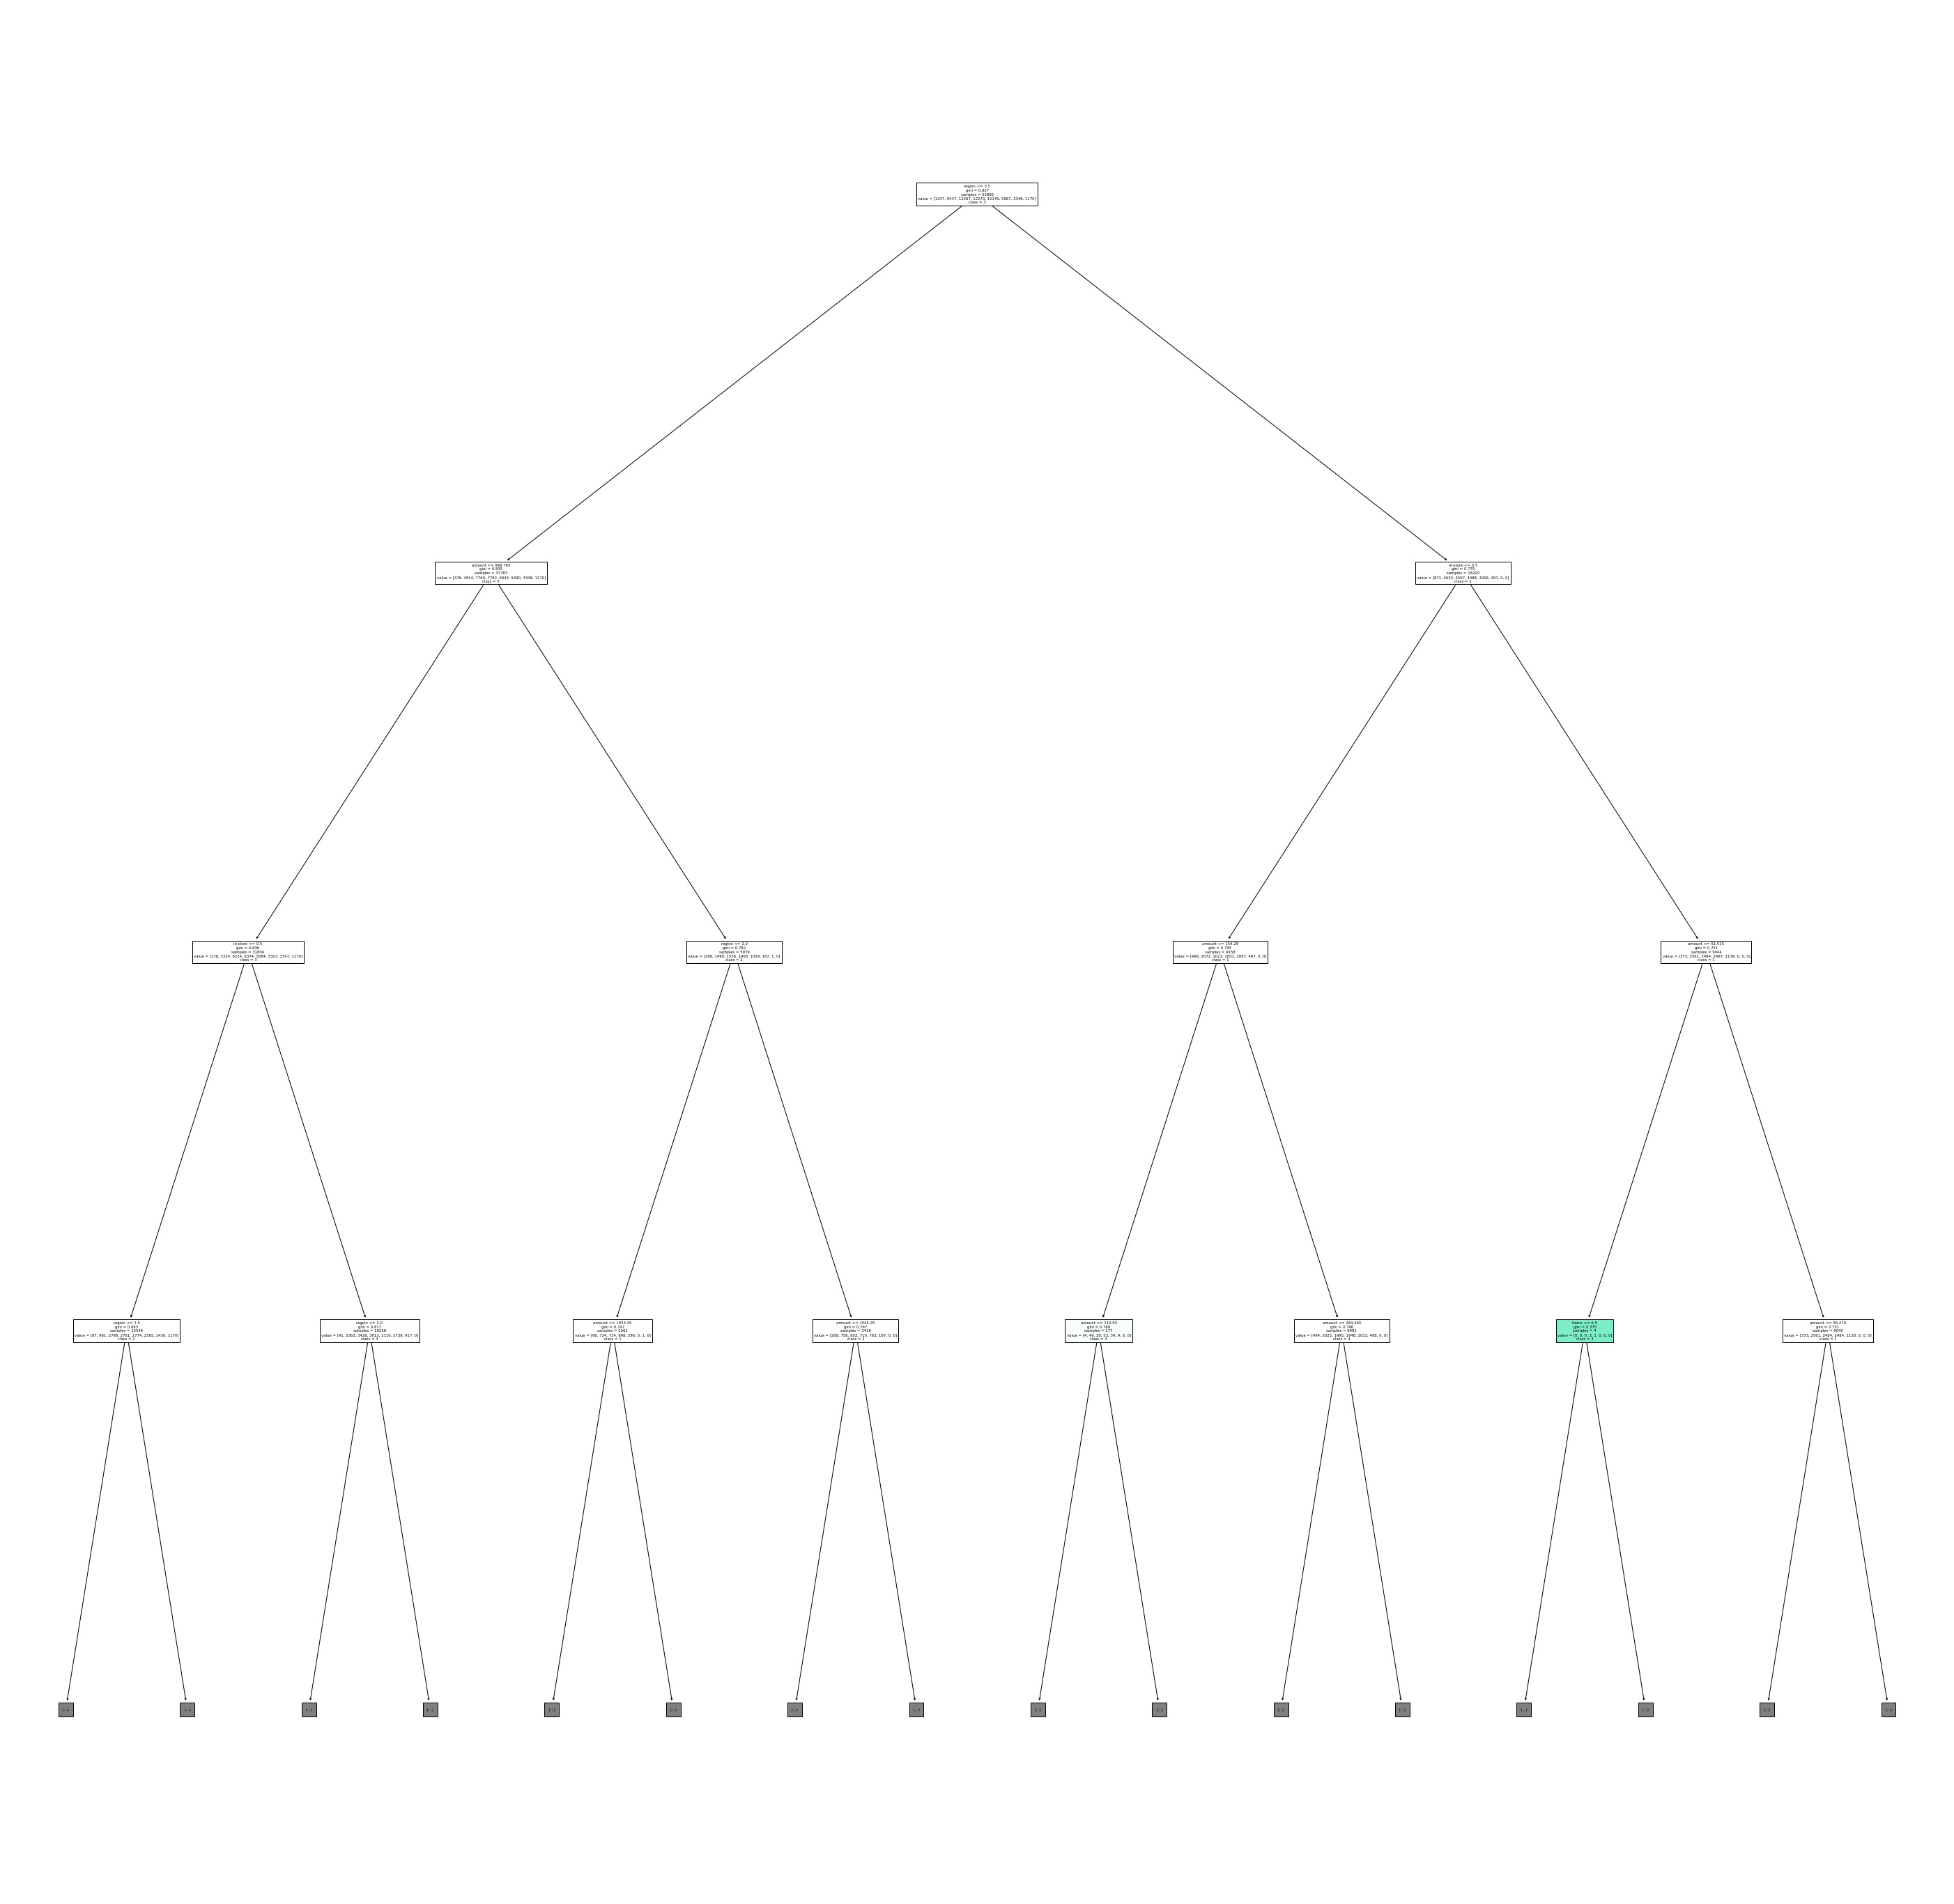

In [15]:
#optional tree visualization
from sklearn.tree import plot_tree
from sklearn import tree

fig = plt.figure(figsize=(50,50))
tree = plot_tree(model, max_depth=3, feature_names=X.columns,class_names=['0','1','2','3','4','5','6','7'], filled=True)

In [16]:
#discretizing amount and using it as the dependent variable
print (np.median(data2['amount']))
print (np.max(data2['amount']))

582.14
3000.0


In [17]:
#discretize amount
amount_array = ([0,1000,3000])

In [18]:
data2['amount_bin'] = pd.cut(data['amount'],amount_array,labels = False )

In [19]:
data2 = data2.drop(columns = ['amount'])
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79979 entries, 0 to 79999
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   in-store    79979 non-null  int64
 1   age         79979 non-null  int64
 2   items       79979 non-null  int64
 3   region      79979 non-null  int64
 4   amount_bin  79979 non-null  int64
dtypes: int64(5)
memory usage: 3.7 MB


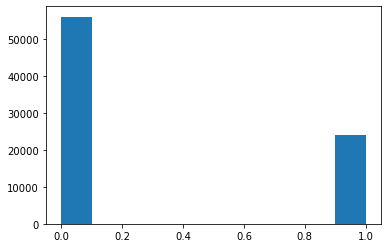

In [20]:
#histogram of amount bin
plt.hist(data2['amount_bin'])
plt.show()

In [21]:
X2 = data2.iloc[:,0:4]
print('Summary of feature sample')
X2.head()

Summary of feature sample


,in-store,age,items,region
0,0,37,4,2
1,0,35,2,2
2,1,45,3,4
3,1,46,3,3
4,1,33,4,1


In [22]:
y2 = data2['amount_bin']

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size = .30, random_state = 123)

algo2 = DecisionTreeClassifier()
model2 = algo.fit(X2_train,y2_train)

preds2 = model2.predict(X2_test)

print(classification_report(y2_test, preds2))

              precision    recall  f1-score   support

           0       0.87      0.83      0.85     16833
           1       0.64      0.70      0.67      7161

    accuracy                           0.79     23994
   macro avg       0.75      0.77      0.76     23994
weighted avg       0.80      0.79      0.80     23994



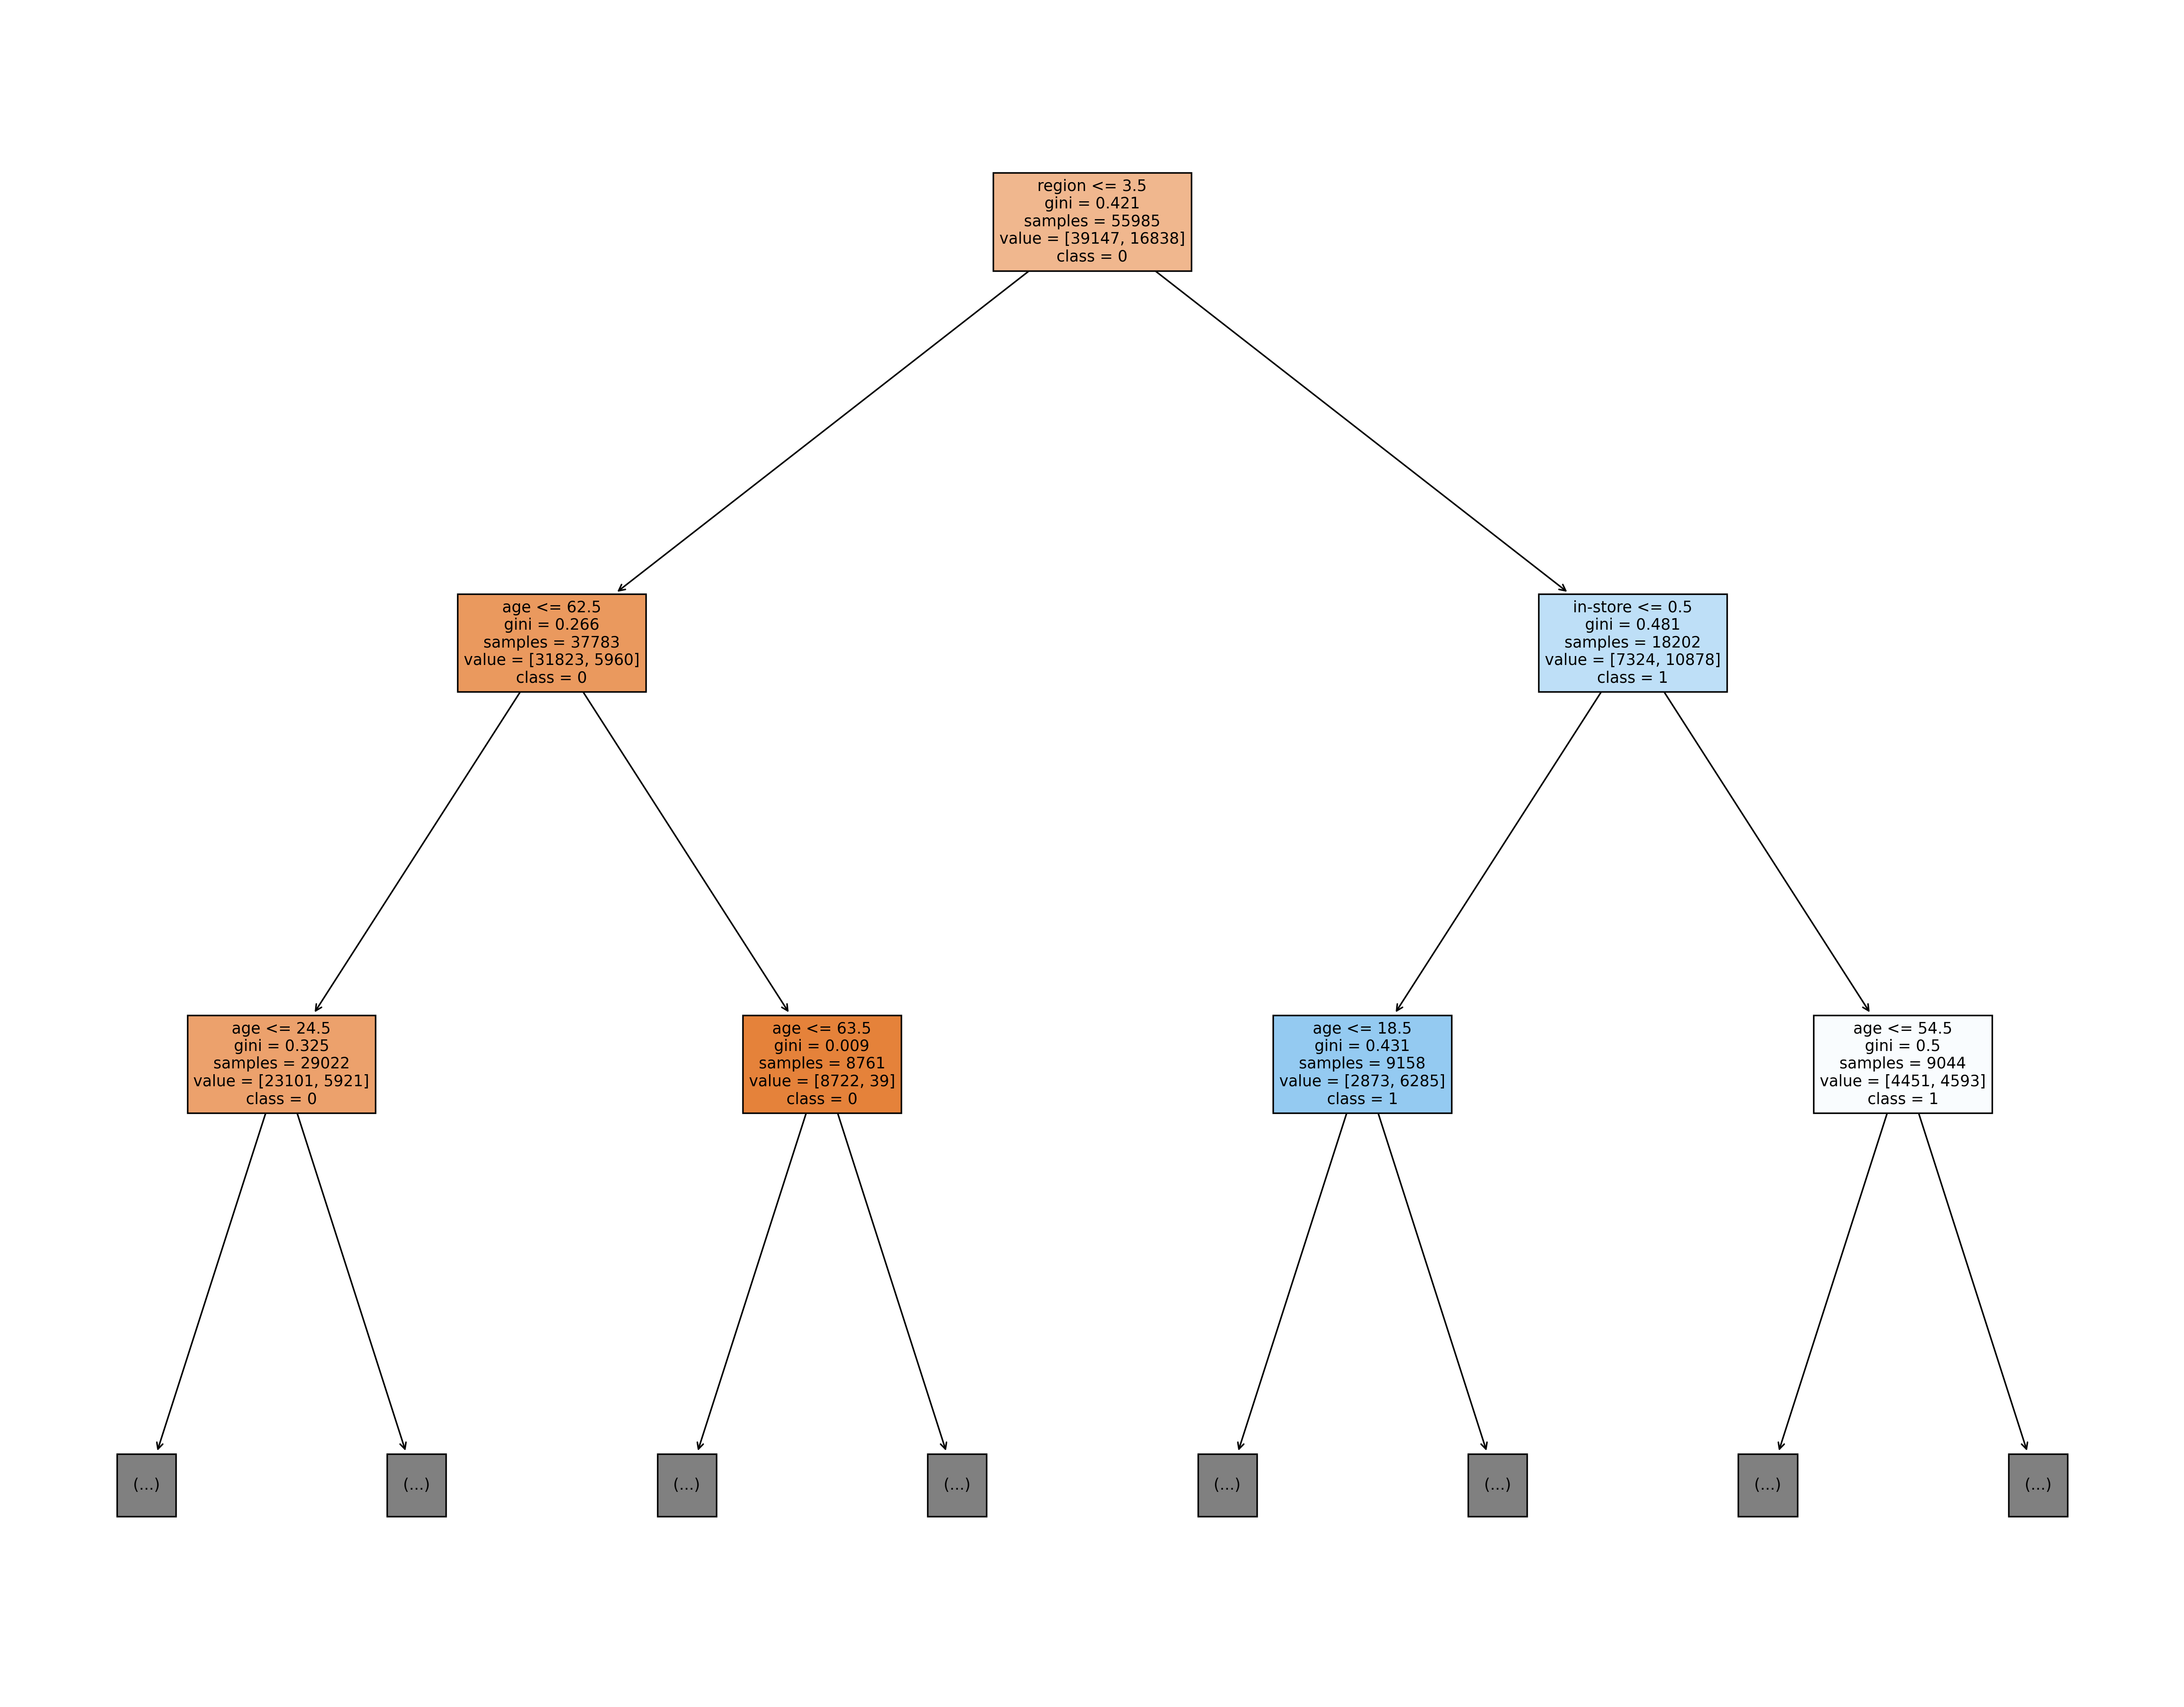

In [23]:
from sklearn.tree import plot_tree
from sklearn import tree

fig2 = plt.figure(figsize=(25,20),dpi=250)
tree2 = plot_tree(model2, fontsize=10, max_depth=2, feature_names=X2.columns,class_names=['0','1'], filled=True)

In [24]:
#changing amount of bins for age
bins2_array = ([10,50,90])

In [25]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79979 entries, 0 to 79999
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   in-store  79979 non-null  int64  
 1   age       79979 non-null  int64  
 2   items     79979 non-null  int64  
 3   amount    79979 non-null  float64
 4   region    79979 non-null  int64  
dtypes: float64(1), int64(4)
memory usage: 3.7 MB


In [26]:
data3['age_bin'] = pd.cut(data3['age'],bins2_array,labels = False )

In [27]:
data3 = data3.drop(columns = ['age'])
data3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79979 entries, 0 to 79999
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   in-store  79979 non-null  int64  
 1   items     79979 non-null  int64  
 2   amount    79979 non-null  float64
 3   region    79979 non-null  int64  
 4   age_bin   79979 non-null  int64  
dtypes: float64(1), int64(4)
memory usage: 3.7 MB


In [28]:
X3 = data3.iloc[:,0:4]
print('Summary of feature sample')
X3.head()

Summary of feature sample


,in-store,items,amount,region
0,0,4,281.03,2
1,0,2,219.51,2
2,1,3,1525.70,4
3,1,3,715.25,3
4,1,4,1937.50,1


In [29]:
y3 = data3['age_bin']

X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size = .30, random_state = 123)

algo3 = DecisionTreeClassifier()
model3 = algo.fit(X3_train,y3_train)

preds3 = model3.predict(X3_test)

print(classification_report(y3_test, preds3))

              precision    recall  f1-score   support

           0       0.68      0.68      0.68     15150
           1       0.45      0.45      0.45      8844

    accuracy                           0.60     23994
   macro avg       0.56      0.56      0.56     23994
weighted avg       0.59      0.60      0.60     23994



In [30]:
print(classification_report(y_test, preds))
print('--------------------------------------------')
print(classification_report(y2_test, preds2))
print('------------------------------------------')
print(classification_report(y3_test, preds3))

              precision    recall  f1-score   support

           1       0.05      0.04      0.05       628
           2       0.20      0.21      0.20      3961
           3       0.23      0.22      0.23      5235
           4       0.23      0.23      0.23      5326
           5       0.19      0.20      0.19      4283
           6       0.16      0.16      0.16      2598
           7       0.13      0.13      0.13      1439
           8       0.09      0.09      0.09       524

    accuracy                           0.20     23994
   macro avg       0.16      0.16      0.16     23994
weighted avg       0.20      0.20      0.20     23994

--------------------------------------------
              precision    recall  f1-score   support

           0       0.87      0.83      0.85     16833
           1       0.64      0.70      0.67      7161

    accuracy                           0.79     23994
   macro avg       0.75      0.77      0.76     23994
weighted avg       0.80      0.7

In [31]:
#checking what decision tree says about items being the dependent variable
y4=data4['items']

In [32]:
y4.head()

0    4
1    2
2    3
3    3
4    4
Name: items, dtype: int64

In [33]:
print (np.median(data4['items']))
print (np.max(data4['items']))

4.0
8


In [34]:
X4 = data4[['in-store', 'age','region','amount']]
print('Summary of feature sample')
X4.head()


Summary of feature sample


,in-store,age,region,amount
0,0,37,2,281.03
1,0,35,2,219.51
2,1,45,4,1525.70
3,1,46,3,715.25
4,1,33,1,1937.50


In [35]:
X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size = .30, random_state = 123)
algo4 = DecisionTreeClassifier()
model4 = algo4.fit(X4_train,y4_train)
preds4 = model4.predict(X4_test)
print(classification_report(y4_test, preds4))

              precision    recall  f1-score   support

           1       0.08      0.08      0.08      1738
           2       0.14      0.14      0.14      3416
           3       0.14      0.14      0.14      3444
           4       0.14      0.13      0.13      3505
           5       0.14      0.14      0.14      3351
           6       0.14      0.14      0.14      3414
           7       0.14      0.14      0.14      3396
           8       0.07      0.07      0.07      1730

    accuracy                           0.13     23994
   macro avg       0.13      0.13      0.13     23994
weighted avg       0.13      0.13      0.13     23994



In [36]:
#from sklearn.tree import plot_tree
#from sklearn import tree

#fig = plt.figure(figsize=(50,50))
#tree = plot_tree(model, max_depth=3, feature_names=X.columns,class_names=['0','1','2','3','4','5','6','7'], filled=True)

In [57]:
#in-store is the dependent variable
#1-in store
#0- online
y5=data4['in-store']

In [58]:
X5 = data4[['items', 'age','region','amount']]
print('Summary of feature sample')
X5.head()


Summary of feature sample


,items,age,region,amount
0,4,37,2,281.03
1,2,35,2,219.51
2,3,45,4,1525.70
3,3,46,3,715.25
4,4,33,1,1937.50


In [59]:
X5_train, X5_test, y5_train, y5_test = train_test_split(X5, y5, test_size = .30, random_state = 123)
algo5 = DecisionTreeClassifier()
model5 = algo5.fit(X5_train,y5_train)
preds5 = model5.predict(X5_test)
print(classification_report(y5_test, preds5))

              precision    recall  f1-score   support

           0       0.84      0.85      0.84     11874
           1       0.85      0.84      0.84     12120

    accuracy                           0.84     23994
   macro avg       0.84      0.84      0.84     23994
weighted avg       0.84      0.84      0.84     23994



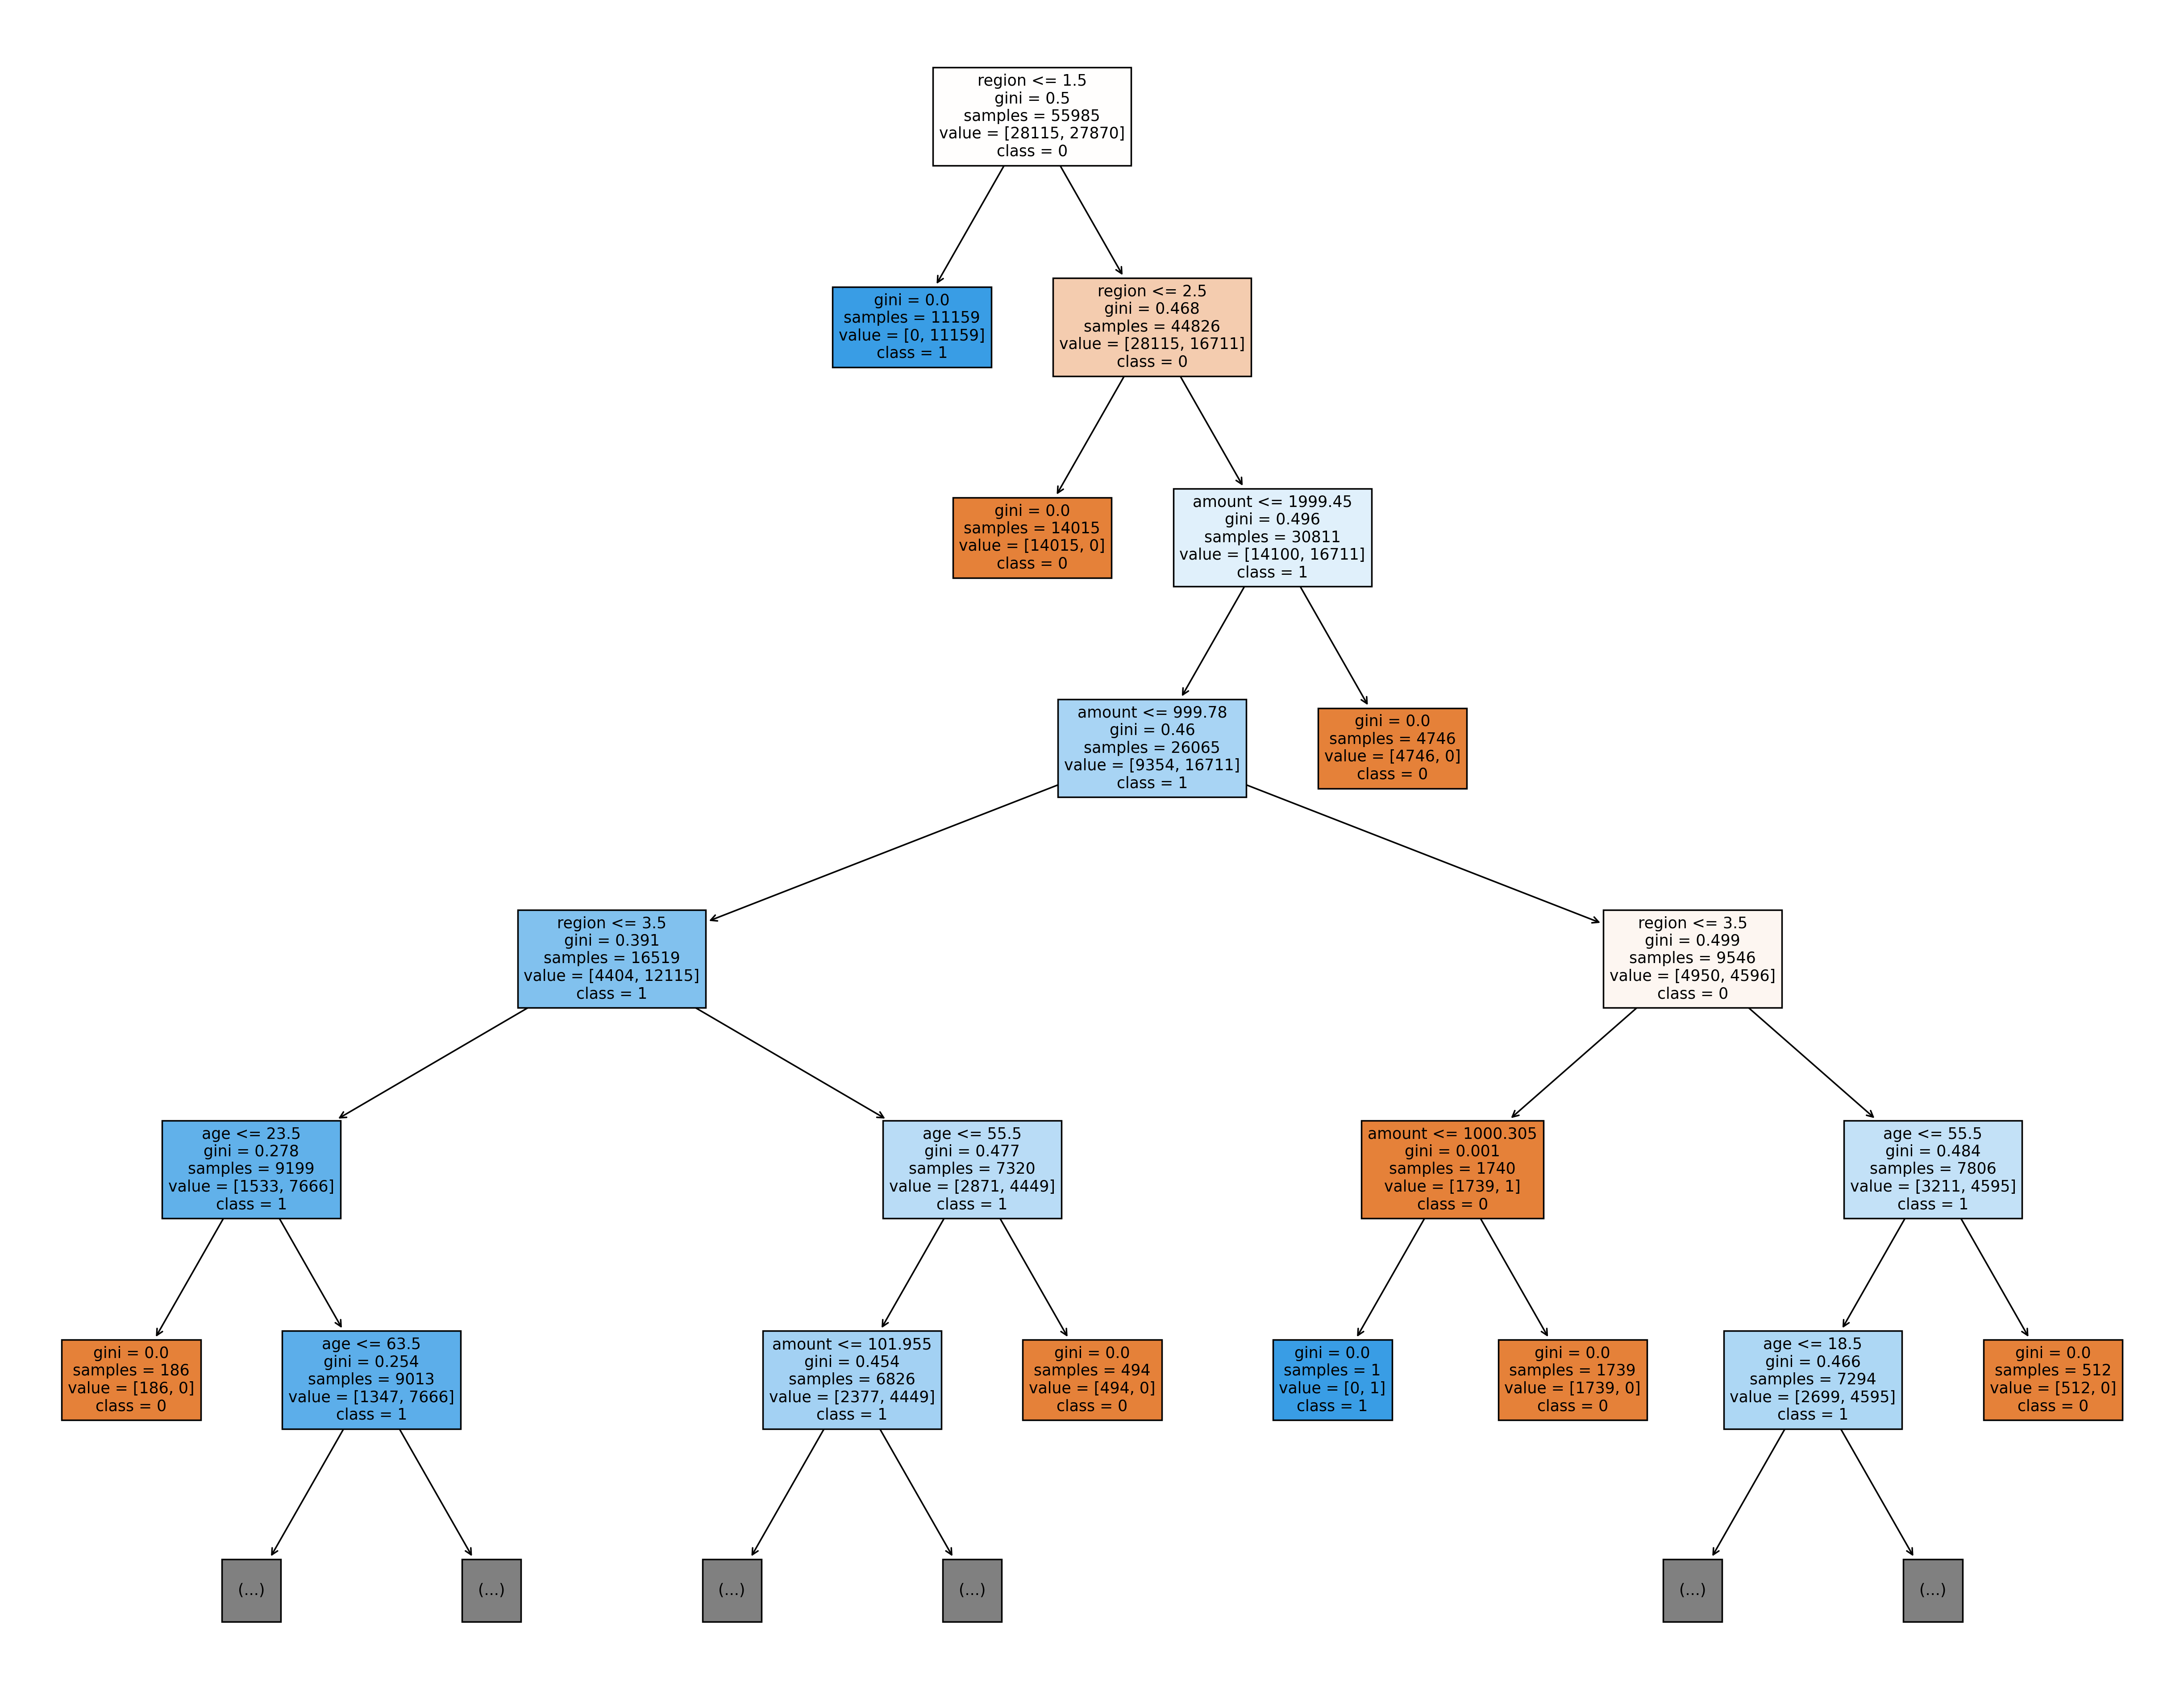

In [60]:
fig5 = plt.figure(figsize=(25,20),dpi=250)
tree5 = plot_tree(model5, fontsize=10, max_depth=6, feature_names=X5.columns,class_names=['0','1'], filled=True)

In [41]:
#step 4
#Cross Validation and Choosing the Right Model

from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier

model = DecisionTreeClassifier()
#print(X)
#print('------1')
#print(y)
#print('------2')
print(cross_val_score(model, X, y, cv=3)) # cv = number of folds being held out

[0.19643661 0.19677419 0.19299299]


In [42]:
#modeling format
#age_bins=y, discretizing age
#https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html

algos_Class = []
algos_Class.append(('Random Forest Classifier', RandomForestClassifier()))
algos_Class.append(('Decision Tree Classifier', DecisionTreeClassifier()))
algos_Class.append(('Gradient Boosting Classifier', GradientBoostingClassifier()))
algos_Class.append(('AdaBoostClassifier',AdaBoostClassifier()))
#classification
results = []
names = []
for name, model in algos_Class:
    result = cross_val_score(model, X,y, cv=3, scoring='accuracy')
    names.append(name)
    results.append(result)
    
for i in range(len(names)):
    print(names[i],results[i].mean())

Random Forest Classifier 0.19518872647378993
Decision Tree Classifier 0.1954762828896954
Gradient Boosting Classifier 0.21973268693218917
AdaBoostClassifier 0.1930883917573414


In [43]:
#amount=y, discretizing amount

model2 = DecisionTreeClassifier()
algos_Class2 = []
algos_Class2.append(('Random Forest Classifier', RandomForestClassifier()))
algos_Class2.append(('Decision Tree Classifier', DecisionTreeClassifier()))
algos_Class2.append(('Gradient Boosting Classifier', GradientBoostingClassifier()))
algos_Class2.append(('AdaBoostClassifier',AdaBoostClassifier()))

results2 = []
names2 = []
for name, model2 in algos_Class2:
    result2 = cross_val_score(model2, X2,y2, cv=3, scoring='accuracy')
    names2.append(name)
    results2.append(result2)
    
for i in range(len(names)):
    print(names2[i],results2[i].mean())

Random Forest Classifier 0.7893196971361075
Decision Tree Classifier 0.7887570466268993
Gradient Boosting Classifier 0.7958588591219226
AdaBoostClassifier 0.7665136753823476


In [44]:
#age_bins=y but fewer bins

model3 = DecisionTreeClassifier()
algos_Class3 = []
algos_Class3.append(('Random Forest Classifier', RandomForestClassifier()))
algos_Class3.append(('Decision Tree Classifier', DecisionTreeClassifier()))
algos_Class3.append(('Gradient Boosting Classifier', GradientBoostingClassifier()))
algos_Class3.append(('AdaBoostClassifier',AdaBoostClassifier()))

results3 = []
names3 = []
for name, model3 in algos_Class3:
    result3 = cross_val_score(model3, X3,y3, cv=3, scoring='accuracy')
    names3.append(name)
    results3.append(result3)
    
for i in range(len(names)):
    print(names3[i],results3[i].mean())

Random Forest Classifier 0.5970441778643018
Decision Tree Classifier 0.595806328077762
Gradient Boosting Classifier 0.6850547941197761
AdaBoostClassifier 0.6802660739643818


In [45]:
#items are the dependent variable y=items

model4 = DecisionTreeClassifier()
algos_Class4 = []
algos_Class4.append(('Random Forest Classifier', RandomForestClassifier()))
algos_Class4.append(('Decision Tree Classifier', DecisionTreeClassifier()))
algos_Class4.append(('Gradient Boosting Classifier', GradientBoostingClassifier()))
algos_Class4.append(('AdaBoostClassifier',AdaBoostClassifier()))

results4 = []
names4 = []
for name, model4 in algos_Class4:
    result4 = cross_val_score(model4, X4,y4, cv=3, scoring='accuracy')
    names4.append(name)
    results4.append(result4)
    
for i in range(len(names)):
    print(names4[i],results4[i].mean())

Random Forest Classifier 0.13327245827361414
Decision Tree Classifier 0.13235975025865698
Gradient Boosting Classifier 0.14580075774035597
AdaBoostClassifier 0.1455632049165373


In [46]:
#in-store is the dependent variable
model5 = DecisionTreeClassifier()
algos_Class5 = []
algos_Class5.append(('Random Forest Classifier', RandomForestClassifier()))
algos_Class5.append(('Decision Tree Classifier', DecisionTreeClassifier()))
algos_Class5.append(('Gradient Boosting Classifier', GradientBoostingClassifier()))
algos_Class5.append(('AdaBoostClassifier',AdaBoostClassifier()))

results5 = []
names5 = []
for name, model5 in algos_Class5:
    result5 = cross_val_score(model5, X5,y5, cv=3, scoring='accuracy')
    names5.append(name)
    results5.append(result5)
    
for i in range(len(names)):
    print(names5[i],results5[i].mean())

Random Forest Classifier 0.8605758997234586
Decision Tree Classifier 0.8459970613644446
Gradient Boosting Classifier 0.8873454123499366
AdaBoostClassifier 0.8435089327679082


In [47]:
corr_mat = data.corr()
print(corr_mat)

          in-store     items    amount    region   age_bin
in-store  1.000000 -0.003897 -0.085573 -0.133171 -0.172223
items    -0.003897  1.000000  0.000384 -0.001904  0.000294
amount   -0.085573  0.000384  1.000000  0.403486 -0.276484
region   -0.133171 -0.001904  0.403486  1.000000 -0.230486
age_bin  -0.172223  0.000294 -0.276484 -0.230486  1.000000


In [48]:
cov_mat = data.cov()
print(cov_mat)

           in-store     items         amount      region     age_bin
in-store   0.250003 -0.004017     -30.860425   -0.075019   -0.138801
items     -0.004017  4.248751       0.570791   -0.004421    0.000978
amount   -30.860425  0.570791  520221.252295  327.874873 -321.433413
region    -0.075019 -0.004421     327.874873    1.269321   -0.418560
age_bin   -0.138801  0.000978    -321.433413   -0.418560    2.598091


In [49]:
corr_mat2 = data2.corr()
print(corr_mat2)

            in-store       age     items    region  amount_bin
in-store    1.000000 -0.178180 -0.003897 -0.133171   -0.097598
age        -0.178180  1.000000  0.000657 -0.235370   -0.285715
items      -0.003897  0.000657  1.000000 -0.001904    0.002731
region     -0.133171 -0.235370 -0.001904  1.000000    0.389945
amount_bin -0.097598 -0.285715  0.002731  0.389945    1.000000


In [50]:
corr_mat3 = data3.corr()
print(corr_mat3)

          in-store     items    amount    region   age_bin
in-store  1.000000 -0.003897 -0.085573 -0.133171 -0.153889
items    -0.003897  1.000000  0.000384 -0.001904  0.002396
amount   -0.085573  0.000384  1.000000  0.403486 -0.202534
region   -0.133171 -0.001904  0.403486  1.000000 -0.170318
age_bin  -0.153889  0.002396 -0.202534 -0.170318  1.000000


In [61]:
corr_mat4 = data4.corr()
print(corr_mat4)

          in-store       age     items    amount    region
in-store  1.000000 -0.178180 -0.003897 -0.085573 -0.133171
age      -0.178180  1.000000  0.000657 -0.282033 -0.235370
items    -0.003897  0.000657  1.000000  0.000384 -0.001904
amount   -0.085573 -0.282033  0.000384  1.000000  0.403486
region   -0.133171 -0.235370 -0.001904  0.403486  1.000000


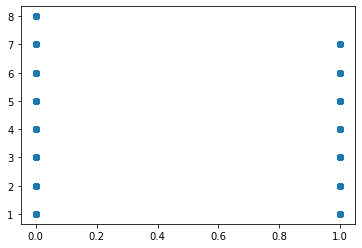

In [53]:
data_sample = data.sample(1000)

x = data_sample['in-store']
y = data_sample['age_bin']
plt.scatter(x,y, marker='o')
plt.show()

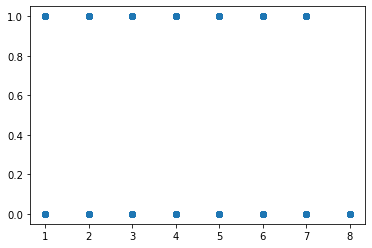

In [54]:
data_sample = data.sample(1000)

x = data_sample['age_bin']
y = data_sample['in-store']
plt.scatter(x,y, marker='o')
plt.show()

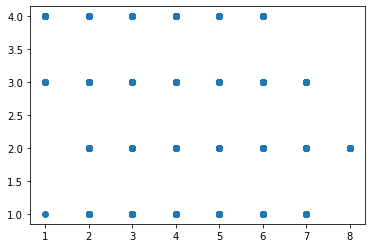

In [55]:
data_sample = data.sample(1000)

x = data_sample['age_bin']
y = data_sample['region']
plt.scatter(x,y, marker='o')
plt.show()

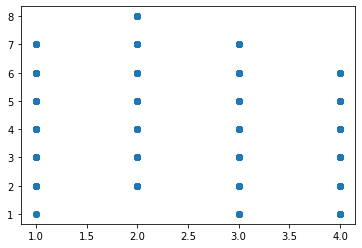

In [56]:
data_sample = data.sample(1000)

x = data_sample['region']
y = data_sample['age_bin']
plt.scatter(x,y, marker='o')
plt.show()